In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np  
import pandas as pd  

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

# Data Cleaning 

In [21]:
df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)
df.drop(['EmployeeNumber'], axis=1, inplace=True)
df.shape

(2940, 31)

### Removing Duplicates

In [22]:
df.drop_duplicates(inplace=True)
print(df.shape)
df.index

(1470, 31)


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469],
           dtype='int64', length=1470)

### Removing correlated variables

In [46]:
df_final = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
df_final

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,24907,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,12290,4,No,3,3,1,3,3,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,21457,4,No,3,1,1,5,3,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,13243,2,No,3,4,0,3,2,9,0


# Data Pre-processing

### label Encoding

In [23]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
#     res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
#     res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [24]:
from sklearn import preprocessing

In [47]:
encoded_df = preprocessor(df_final)
X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobRole                   1470 non-null   int32
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int32
 14  MonthlyIncome             1470 non-null 

### Stardardization

In [48]:
X.iloc[:, :]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,2,1102,2,1,1,1,2,0,94,...,19479,8,1,3,1,0,0,1,6,0
1,49,1,279,1,8,0,1,3,1,61,...,24907,1,0,4,4,1,3,3,10,1
2,37,2,1373,1,2,1,4,4,1,92,...,2396,6,1,3,2,0,3,3,0,0
3,33,1,1392,1,3,3,1,4,0,56,...,23159,1,1,3,3,0,3,3,8,3
4,27,2,591,1,2,0,3,1,1,40,...,16632,9,0,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,1,3,3,1,41,...,12290,4,0,3,3,1,3,3,5,0
1466,39,2,613,1,6,0,3,4,1,42,...,21457,4,0,3,1,1,5,3,7,1
1467,27,2,155,1,4,2,1,2,1,87,...,5174,1,1,4,2,1,0,3,6,0
1468,49,1,1023,2,2,2,3,4,1,63,...,13243,2,0,3,4,0,3,2,9,0


In [49]:
data = X.iloc[:, :].values
X_std = preprocessing.scale(data)
X_std = pd.DataFrame(X_std)
print (X_std)
print (type(X_std))

            0         1         2         3         4         5         6   \
0     0.446350  0.590048  0.742527  1.401512 -1.010909 -0.891688 -0.937414   
1     1.322365 -0.913194 -1.297775 -0.493817 -0.147150 -1.868426 -0.937414   
2     0.008343  0.590048  1.414363 -0.493817 -0.887515 -0.891688  1.316673   
3    -0.429664 -0.913194  1.461466 -0.493817 -0.764121  1.061787 -0.937414   
4    -1.086676  0.590048 -0.524295 -0.493817 -0.887515 -1.868426  0.565311   
...        ...       ...       ...       ...       ...       ...       ...   
1465 -0.101159 -0.913194  0.202082 -0.493817  1.703764 -0.891688  0.565311   
1466  0.227347  0.590048 -0.469754 -0.493817 -0.393938 -1.868426  0.565311   
1467 -1.086676  0.590048 -1.605183 -0.493817 -0.640727  0.085049 -0.937414   
1468  1.322365 -0.913194  0.546677  1.401512 -0.887515  0.085049  0.565311   
1469 -0.320163  0.590048 -0.432568 -0.493817 -0.147150  0.085049  0.565311   

            7         8         9   ...        15        16    

In [50]:
cols={}
for i in range(len(df.columns)):
    cols[i] = df.columns[i]

X_std.rename(columns = cols, inplace=True)
X_std.reset_index()
X_std

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,0.726020,2.125136,1.591746,-0.426230,-1.584178,-0.932014,-2.171982,-2.493820,-0.164613,-0.679146
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,1.488876,-0.678049,-0.628241,2.346151,1.191438,0.241988,0.155707,0.338096,0.488508,-0.368715
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-1.674841,1.324226,1.591746,-0.426230,-0.658973,-0.932014,0.155707,0.338096,-1.144294,-0.679146
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,1.243211,-0.678049,1.591746,-0.426230,0.266233,-0.932014,0.155707,0.338096,0.161947,0.252146
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,0.325900,2.525591,-0.628241,-0.426230,1.191438,0.241988,0.155707,0.338096,-0.817734,-0.058285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,-0.284329,0.523316,-0.628241,-0.426230,0.266233,0.241988,0.155707,0.338096,-0.327893,-0.679146
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,1.004010,0.523316,-0.628241,-0.426230,-1.584178,0.241988,1.707500,0.338096,-0.001333,-0.368715
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,-1.284418,-0.678049,1.591746,2.346151,-0.658973,0.241988,-2.171982,0.338096,-0.164613,-0.679146
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,...,-0.150393,-0.277594,-0.628241,-0.426230,1.191438,-0.932014,0.155707,-1.077862,0.325228,-0.679146


### Train - Test Split

In [51]:
X = X_std
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Determining optimal value of K

In [52]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

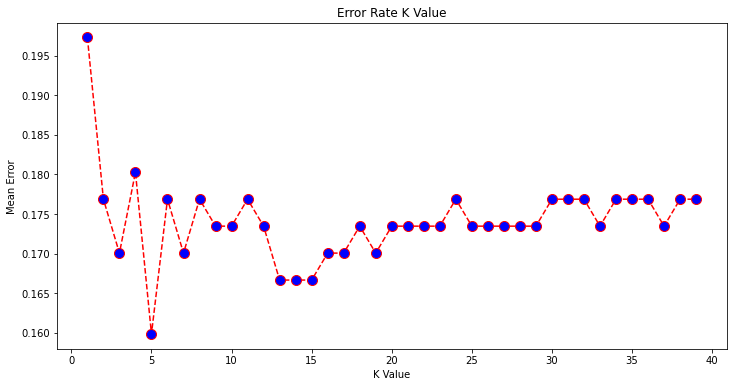

In [53]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()
# K = 8 is the optimum value

In [54]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=14)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [55]:
y_pred = classifier.predict(X_test)  

In [56]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[242   0]
 [ 49   3]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       242
           1       1.00      0.06      0.11        52

    accuracy                           0.83       294
   macro avg       0.92      0.53      0.51       294
weighted avg       0.86      0.83      0.77       294



In [57]:
from sklearn import metrics

In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[242,   0],
       [ 49,   3]], dtype=int64)

In [59]:
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

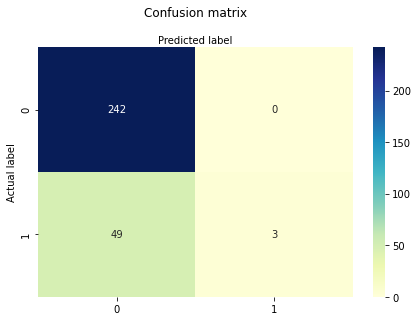

In [60]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

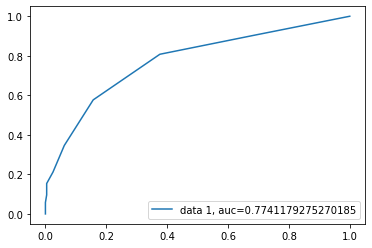

In [61]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()